# Fatal police shooting cases in the USA 2015-2020

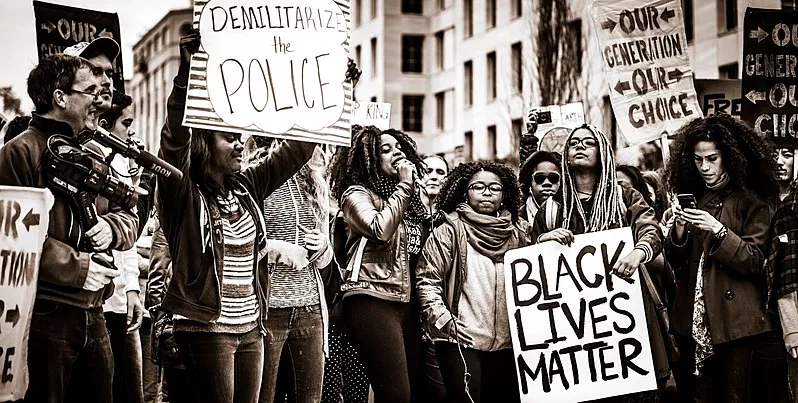

Since January 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

The Washington Post is tracking more than a dozen details about each killing including the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis.

They have gathered this information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import warnings
import plotly.offline as pyo
pyo.init_notebook_mode()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
sns.set_style('white')
%matplotlib inline

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In this dataset we have many informations about these cases, like characteristics of the victim and some circumstances of the case.

In [ ]:
df = pd.read_csv('../input/eddie1/fatal-police-shootings-data.txt')
df.head()

## Dates and week days
Considering a monthly period over these 6 years, we can see that in the half of 2015, at the beginning of 2018 and in the first quarter of 2020 we reached some peaks of about more than 100 cases in on month.
On a monthly basis, we can't see a clear seasonality of the phenomenon.

In [ ]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))
df['date'].groupby(df.date.dt.to_period('M')).count().plot(kind='line')

As this plot shows, we don't have evidence that more cases happen during the weekend.

In [ ]:
count = df['date'].apply(lambda x: 'Weekday' if x.dayofweek < 5 else 'Weekend').value_counts(normalize=True)
f, ax = plt.subplots(1,1)
sns.barplot(x=count.index, y=count.values, ax=ax, palette='twilight')

Investigating more on days of the week, we can see that the central days of the week have an higher percentage of cases.

In [ ]:
count = df['date'].apply(lambda x: x.dayofweek).value_counts(normalize=True).sort_index()
count.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
f, ax = plt.subplots(1,1)
sns.barplot(x=count.index, y=count.values, ax=ax, palette='twilight')
ax.set_title('Cases (%) for each day of the week');

## Victim state and police body camera
Let's go ahead with a brief description of these four countplots:
- we can see that only in 20% of cases victims had signs of mental instability
- in only 10% of cases policeman had the body camera
- as we could expect, in 70% of cases the situation was declared dangerous
- manner of death doesn't seem to be an interesting variable beacause most of the cases are "shot".

In [ ]:
count_1 = df['signs_of_mental_illness'].value_counts(normalize=True)
count_2 = df['threat_level'].value_counts(normalize=True)
count_3 = df['body_camera'].value_counts(normalize=True)
count_4 = df['manner_of_death'].value_counts(normalize=True)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
sns.barplot(x=count_1.index, y=count_1.values, palette="rocket", ax=axes[0,0])
axes[0,0].set_title('Signs of mental illness (%)')
sns.barplot(x=count_2.index, y=count_2.values, palette="viridis", ax=axes[0,1])
axes[0,1].set_title('Threat level (%)')
sns.barplot(x=count_3.index, y=count_3.values, palette="nipy_spectral", ax=axes[1,0])
axes[1,0].set_title('Body camera (%)')
sns.barplot(x=count_4.index, y=count_4.values, palette="gist_heat", ax=axes[1,1])
axes[1,1].set_title('Manner of death (%)');

## Is USA police racist?
The race column let us know that in many cases of fatal shooting white people are involved, followed by black and hispanic.

In [ ]:
count = df.race.value_counts(normalize=True)
count.index = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other']

f, ax = plt.subplots(1,1, figsize=(8,6))
sns.barplot(y=count.index, x=count.values, palette='Reds_r')
ax.set_title('Total cases for each race (%)');


But let's consider the race shares in the USA in 2019, we can see that in proportion there is an higher rate of victims from the black USA population.

Share of races source: https://data.census.gov/cedsci/table?q=Hispanic%20or%20Latino&tid=ACSDP1Y2019.DP05&hidePreview=false

In [ ]:
share_race_usa_2019 = pd.Series([60.0, 12.4, 0.9, 5.6, 18.4, 2.7], index=['White','Black','Native American','Asian','Hispanic','Other'])

count_races = count / share_race_usa_2019
count_races = count_races.sort_values(ascending=False)
f, ax = plt.subplots(1,1, figsize=(8,6))
sns.barplot(y=count_races.index, x=count_races.values, palette='Greens_r')
ax.set_title('Total cases for each race on total USA race percentage rate');

## Age of victims
Frome these stacked kernel density plots, we can see that:
- for asian and white, in most of the cases about 30 years old victims were involved
- for other and native american, in most of the cases about 28 years old victims were involved
- for hispanic and black, in most of the cases about 25 years old victims were involved

So we can say that for hispanic and black people, younger persons had been victims of police shoting.

In [ ]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.xaxis.set_ticks(np.arange(0,100,10))

sns.kdeplot(df[df.race == 'N'].age, ax=axes, shade=True, color='#7FFFD4')
sns.kdeplot(df[df.race == 'O'].age, ax=axes, shade=True, color='#40E0D0')
sns.kdeplot(df[df.race == 'B'].age, ax=axes, shade=True, color='#00CED1')
sns.kdeplot(df[df.race == 'H'].age, ax=axes, shade=True, color='#6495ED')
sns.kdeplot(df[df.race == 'A'].age, ax=axes, shade=True, color='#4682B4')
sns.kdeplot(df[df.race == 'W'].age, ax=axes, shade=True, color='#008B8B')


legend = axes.legend_
legend.set_title("Race")
for t, l in zip(legend.texts,("Native", "Other", 'Black', 'Hispanic', 'Asian', 'White')):
    t.set_text(l)

## Weapons and gender
Analyzing most used weapons for men and women we can see that:
- guns are most used weapons for both categories
- women had relatively more knives as weapons
- women were relatively more unarmed or had toy weapons

In [ ]:
count_1 = df[df.gender == 'M'].armed.value_counts(normalize=True)[:10]
count_2 = df[df.gender == 'F'].armed.value_counts(normalize=True)[:10]

fig, axes = plt.subplots(1,2, figsize=(16,6))
plt.subplots_adjust(wspace=0.3)
sns.barplot(y=count_1.index, x=count_1.values, ax=axes[0])
axes[0].set_title('Most used weapons - Male')
sns.barplot(y=count_2.index, x=count_2.values, ax=axes[1])
axes[1].set_title('Most used weapons - Female');

We can see that in 87% of police shoting cases, victimes were armed, in 6.5% of cases they were unarmed and in 3.5% of cases they had a toy weapon.

In [ ]:
def armed_or_not(x):
    if x != 'unarmed' and x != 'toy weapon' and x != 'undetermined':
        return 'armed'
    if x == 'toy weapon':
        return 'toy weapon'
    if x == 'undetermined':
        return 'undetermined'
    else:
        return 'unarmed'
    
armed_or_not = df.armed.apply(armed_or_not).value_counts(normalize=True)
fig = px.pie(values = armed_or_not.values, names = armed_or_not.index, title='Armed or unarmed (%)')
fig.update(layout=dict(title=dict(x=0.5),autosize=False, width=450, height=450))
fig.show()

As expected, more than 95% of the victims are male

In [ ]:
fig = px.pie(values = df.gender.value_counts(normalize=True).values, names=df.gender.value_counts(normalize=True).index, title='Total cases gender (%)')
fig.update(layout=dict(title=dict(x=0.5),autosize=False, width=400, height=400))
fig.show()

## Poverty rate, median income and completed high school rate relationship with police shoting cases
Now let's import other data about poverty rate, completed high school rate and median housold income and add them to a new dataframe

In [ ]:
cases = df.groupby(['state','city']).count()['id'].reset_index()
cases.columns = ['state','city','cases']
poverty = pd.read_csv('../input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv',encoding='iso-8859-1')
highschool = pd.read_csv('../input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv',encoding='iso-8859-1')
income = pd.read_csv('../input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv', encoding='iso-8859-1')
income['Median Income'] = income['Median Income'].replace({'(X)': np.nan,'-': np.nan})
income = income.fillna(0)
pov_sch = pd.merge(poverty,highschool)
pov_sch = pd.merge(pov_sch,income)
pov_sch.columns = ['state','city','poverty_rate','percent_completed_hs','median_income']
pov_sch['city'] = pov_sch['city'].apply(lambda x: x.rsplit(' ',1)[0])
rmv_indx = pov_sch[['state','city']][pov_sch[['state','city']].duplicated()].index
pov_sch = pov_sch.drop(rmv_indx)
pov_sch = pd.merge(cases,pov_sch,on=['state','city'],how='left')
pov_sch['poverty_rate'] = pov_sch['poverty_rate'].astype(float)
pov_sch['percent_completed_hs'] = pov_sch['percent_completed_hs'].astype(float)
pov_sch['median_income'] = pov_sch['median_income'].astype(float)
pov_sch.head()

Now let's import a dataset I created with geographical, demographical info and the rate of cases on the total population by city. Then let's merge it with the previous dataset, so we can see the relationship between poverty rate, completed high school rate, median income and the rate of police shoting cases on the total population.

In [ ]:
geo_demo = pd.read_csv('../input/eddie2/geo_demo_data.csv')
geo_demo = geo_demo.drop('index', axis=1)
total = pd.merge(pov_sch, geo_demo, on=['state','city','cases'],how='left')
total.head()

First of all, all the number are expressed in percentage, so 0.2 means 0.2%.


- poverty rate: cities with more cases don't seem to have an high poverty rate, as the average poverty rate for USA is around 20%
- percent completed highschool: we can see that the points are more concentrated in values higher than 80%
- median income: considering the median income by city, we can see that points are more concentrated between 25k and 50k

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(16, 5))
sns.scatterplot(y='cases_on_pop_rate', x='poverty_rate', data=total[total.population > 100], ax=axes[0], color='#78281F', size='cases_on_pop_rate',legend=False,alpha=0.7,linewidth=0.3)
sns.scatterplot(y='cases_on_pop_rate', x='percent_completed_hs', data=total[total.population > 100], ax=axes[1], color='#145A32', size='cases_on_pop_rate',legend=False,alpha=0.7,linewidth=0.3)
sns.scatterplot(y='cases_on_pop_rate', x='median_income', data=total[(total.population > 100) & (total.median_income > 0)], ax=axes[2], color='#FF6600', size='cases_on_pop_rate',alpha=0.7,linewidth=0.3)
axes[0].set_title('Cases rate on poverty rate (%)')
axes[1].set_title('Cases rate on completed_hs(%)')
axes[2].set_title('Cases rate on median income (%)');

I excluded from the above plots these small cities: for each we have one cases and a really small population.
Couriously we have Odanah with 0 inhabitants, according to Wikipedia in 2010 had 13 inhabitants, so it is possible that this village doesn't exist anymore.

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(10, 5))
sns.barplot(x=total[total.population <= 100].sort_values(['population'],ascending=False).city, y=total[total.population <= 100].sort_values(['population'], ascending=False).population, ax=axes)

Now let's import a dataset from which we can obtain an average race rate of the population of USA states.

In [ ]:
states = {
        'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii',
        'IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts',
        'MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi',
        'MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey',
        'NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico',
        'RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia',
        'VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'
}

states_mapping = {value: key for key, value in states.items()}

state_races = pd.read_csv('../input/eddie2/state_race_populations.csv', sep=';')
state_races['state'] = state_races.state.map(states_mapping)
state_races.head()

Now let's get all the cases for each race of the victims for every state.

In [ ]:
df['race'] = df['race'].fillna('U')
num_cases_race_state = pd.get_dummies(df.race)
num_cases_race_state['state'] = df.state
num_cases_race_state = num_cases_race_state.groupby('state').sum().reset_index()
num_cases_race_state.columns = ['state','asian','black','hispanic','native_american','other','unknown','white']
num_cases_race_state.head()

In [ ]:
total = pd.merge(state_races, num_cases_race_state, on=['state'])
total['white_cases_rate'] = total['white'] / total['total_white'] * 100
total['black_cases_rate'] = total['black'] / total['total_black'] * 100
total['asian_cases_rate'] = total['asian'] / total['total_asian'] * 100
total['native_american_cases_rate'] = total['native_american'] / total['total_native_american'] * 100
total['hispanic_cases_rate'] = total['hispanic'] / total['total_hispanic'] * 100
total['other_cases_rate'] = total['other'] / total['total_other'] * 100
total.head()

This plot show us for each state, the number of cases of each race on the total population of that race.

We can easily see that black population has the highest rate of cases in almost all countries, also native american population has high cases rate in some states.

In particular:
- Utah has the highest black cases on black population rate
- Arkansas has the highest white cases on white population rate
- New Mexico has the highest hispanic cases on hispanic population rate
- Wyoming has the highest native american cases on native american population rate
- South Dakota has the highest asian cases on asian population rate
- Hawaii has the highest "other" cases on "other" population rate

In [ ]:
g = sns.PairGrid(total.sort_values("black_cases_rate", ascending=False),
                 x_vars=['black_cases_rate','white_cases_rate','hispanic_cases_rate',
                         'native_american_cases_rate','asian_cases_rate','other_cases_rate'],
                 y_vars=['state'],
                 height=10, aspect=.25)

g.map(sns.stripplot, size=10, orient="h",linewidth=1, edgecolor="w")
g.set(xlim=(-0.001, 0.022), xlabel="", ylabel="")

titles = ['black_cases_rate','white_cases_rate','hispanic_cases_rate',
          'native_american_cases_rate','asian_cases_rate','other_cases_rate']

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

## Politic elections 2016
I imported another dataset about USA 2016 politic elections to see if there is a relationship between the rate of non-white cases in a state and the most voted party: I also added the "non-white" cases rate. (source: https://public.opendatasoft.com/explore/dataset/usa-2016-presidential-election-by-county/table/?disjunctive.state)

In [ ]:
df_politic = pd.read_csv('../input/eddie2/usa-2016-presidential-election-by-county.csv')
df_politic = df_politic[['ST','Republicans 2016','Democrats 2016','Green 2016','Libertarians 2016']]
df_politic = df_politic.fillna(0).groupby('ST').mean().drop(0).reset_index()
df_politic.loc[0] = ['AK',51.28,36.55,5.88,1.80]
df_politic.columns = ['state','republicans','democrats','green','libertarians']
df_politic = pd.merge(df_politic, total, on=['state'])

df_politic.head()

Considering that Republicans won in about the 80% of the states, I just considered states in which they obtained a share 3 times bigger than the one obtained by Democrats: we can see that generally, in the states in which Democrats won, the "non-white" cases rate is higher.

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
a = sns.scatterplot(data=df_politic, x='black_cases_rate',y='republicans', ax=axes[0,0], color='#1B6E15')
a.set(xlim=(-0.001,0.015))
b = sns.scatterplot(data=df_politic, x='hispanic_cases_rate',y='republicans', ax=axes[0,1], color='#1B6E15')
b.set(xlim=(-0.001,0.015))
c = sns.scatterplot(data=df_politic, x='native_american_cases_rate',y='republicans', ax=axes[0,2], color='#1B6E15')
c.set(xlim=(-0.001,0.015))
d = sns.scatterplot(data=df_politic, x='black_cases_rate',y='democrats', ax=axes[1,0], color='#FF6600')
d.set(xlim=(-0.001,0.015))
e = sns.scatterplot(data=df_politic, x='hispanic_cases_rate',y='democrats', ax=axes[1,1], color='#FF6600')
e.set(xlim=(-0.001,0.015))
f = sns.scatterplot(data=df_politic, x='native_american_cases_rate',y='democrats', ax=axes[1,2], color='#FF6600')
f.set(xlim=(-0.001,0.015));

## States with more fatal police shoting cases
Let's go ahead with some geographical plots to better visualize the fatal police shooting cases.

This map is telling us that the state in which happend more cases is California (803), followed by Texas (484) and Florida (353). But is California the state in which USA Police is more violent?

In [ ]:
states_cases = pd.DataFrame({'state':df.state.value_counts().index,'cases':list(df.state.value_counts())})

fig = px.choropleth(states_cases, locations='state', locationmode='USA-states', color='cases',
                           range_color=(states_cases.cases.min(),states_cases.cases.max()),
                           scope="usa",
                           color_continuous_scale='reds',
                           title='antani'
                          )
fig.update_layout(title='Total cases in USA', title_x=0.5)

## States in which police victims in more cases don't belong to white population
The first thing I wanted to discover is in which state of the USA police is more racist. In order to this I created a rate made dividing all the cases in which non white people were involved by the total non white population of the state.

We can see that the highest rate is detected in West Virginia, followed by New Mexico, Alaska, Wyoming and Colorado.

In [ ]:
total['non_white_cases'] = total.asian + total.black + total.hispanic + total.native_american + total.other
total['non_white_population'] = total.total_black + total.total_hispanic + total.total_asian + total.total_native_american + total.total_other
total['non_white_cases_rate'] = total.non_white_cases / total.non_white_population
states_rates = total[['state','non_white_cases_rate']]

fig = px.choropleth(states_rates, locations='state', locationmode='USA-states', color='non_white_cases_rate',
                           range_color=(states_rates.non_white_cases_rate.min(),states_rates.non_white_cases_rate.max()),
                           scope="usa",
                           color_continuous_scale='reds',
                           title = 'Non-white cases on total population rate (%)'
                          )
fig.update_layout(title_x = 0.5)

## States in which police shoots more to black people considering black population size
To find the right answer to this question, I used a rate made dividing the total cases in which the victims were black by the total black population of the state.

In this case, Utah has the highest rate, followed by Alaska, West Virginia, Oklahoma and Oregon.

In [ ]:
state_rate = pd.DataFrame({'state': total.state,'black_cases_rate': list(total.black_cases_rate)})

fig = px.choropleth(state_rate, locations='state', locationmode='USA-states', color='black_cases_rate',
                           range_color=(state_rate.black_cases_rate.min(),state_rate.black_cases_rate.max()),
                           scope="usa",color_continuous_scale='reds', title='Black cases on black population rate (%)')

fig.update_layout(title_x = 0.5)
fig.show()

Finally, my objective is to visualize all the cases by city in the USA map, analyzing which zone is riskier. Using data manipulation, I built a dataframe with latitude and longitude of every city involved in fatal police shooting cases.

In [ ]:
fig = go.Figure(data=go.Scattergeo(
        lon = geo_demo['lng'],
        lat = geo_demo['lat'],
        text = geo_demo['city'] + ', ' + geo_demo['state'] + ': ' + geo_demo['cases'].astype(str) ,
        mode = 'markers',
        marker = dict(
            size = geo_demo['cases'].apply(lambda x: 4 if x < 5 else x),
            opacity = 0.8,
            symbol = 'circle',
            colorscale = 'bluered_r',
            reversescale = True,
            cmin = 1,
            color = geo_demo['cases'],
            cmax = geo_demo['cases'].max(),
            colorbar_title="Cases 2015-2019"
        )))

fig.update_layout(
        margin={"r":0,"t":30,"l":0,"b":0},
        title = 'USA: fatal police shooting cases by city 2015-2019',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = False,
            landcolor = "blue",
            subunitcolor = "blue",
            countrycolor = "blue",
            subunitwidth = 0.5
        )
    )
fig.update_layout(title_x=0.5)
fig.show()

Let's zoom on California, we can see that intuitively more cases are in the metropolitan area of Los Angeles and San Francisco.

In [ ]:
cal = geo_demo[geo_demo.state == 'CA']

fig = go.Figure(data=go.Scattergeo(
        lon = cal['lng'],
        lat = cal['lat'],
        text = cal['city'] + ': ' + cal['cases'].astype(str),
        mode = 'markers',
        marker = dict(
            size = cal['cases'].apply(lambda x: 4 if x < 5 else x),
            opacity = 0.8,
            symbol = 'circle',
            colorscale = 'bluered_r',
            reversescale = True,
            cmin = 1,
            color = cal['cases'],
            cmax = cal['cases'].max(),
            colorbar_title="Cases 2015-2019"
        )))

fig.update_layout(
        margin={"r":0,"t":30,"l":0,"b":0},
        title = 'California: fatal police shooting cases by city 2015-2019',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = False,
            landcolor = "blue",
            subunitcolor = "blue",
            countrycolor = "blue",
            subunitwidth = 0.5,
            center = dict(lat = 36.778259, lon = -121.417931),
            projection_scale = 2.3
        )
    )
fig.show()

## Main sources

USA cities coordinates source: https://simplemaps.com/data/us-cities

Cities population dataset source: https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/cities/totals/

Geocoder to find missing coordinates API: https://opencagedata.com/users/sign_in

Demografic USA data: https://data.census.gov/cedsci/

2016 USA election data: https://public.opendatasoft.com/explore/dataset/usa-2016-presidential-election-by-county/table/?disjunctive.state


Source of census data: https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml

Thanks for your attention and please add a comment with your opinion and suggestions in order to improve the quality of this notebook! :)